> LOADING OUR DATASET

In [47]:
f <- file.choose()

ERROR: Error in file.choose(): file choice cancelled


In [11]:
advert = read.csv(f)
head(advert)

Daily.Time.Spent.on.Site Age Area.Income Daily.Internet.Usage
1 68.95                    35  61833.90    256.09              
2 80.23                    31  68441.85    193.77              
3 69.47                    26  59785.94    236.50              
4 74.15                    29  54806.18    245.89              
5 68.37                    35  73889.99    225.58              
6 59.99                    23  59761.56    226.74              
  Ad.Topic.Line                         City           Male Country   
1 Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia   
2 Monitored national standardization    West Jodi      1    Nauru     
3 Organic bottom-line service-desk      Davidton       0    San Marino
4 Triple-buffered reciprocal time-frame West Terrifurt 1    Italy     
5 Robust logistical utilization         South Manuel   0    Iceland   
6 Sharable client-driven software       Jamieberg      1    Norway    
  Timestamp           Clicked.on.Ad
1 2016-03-27 00:53:11 0            
2 2016-04-04 01:39:02 0            
3 2016-03-13 20:35:42 0            
4 2016-01-10 02:31:19 0            
5 2016-06-03 03:36:18 0            
6 2016-05-19 14:30:17 0

In [17]:
#Checking for missing values

colSums(is.na(advert))


Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

> CHECKING FOR OUTLIERS

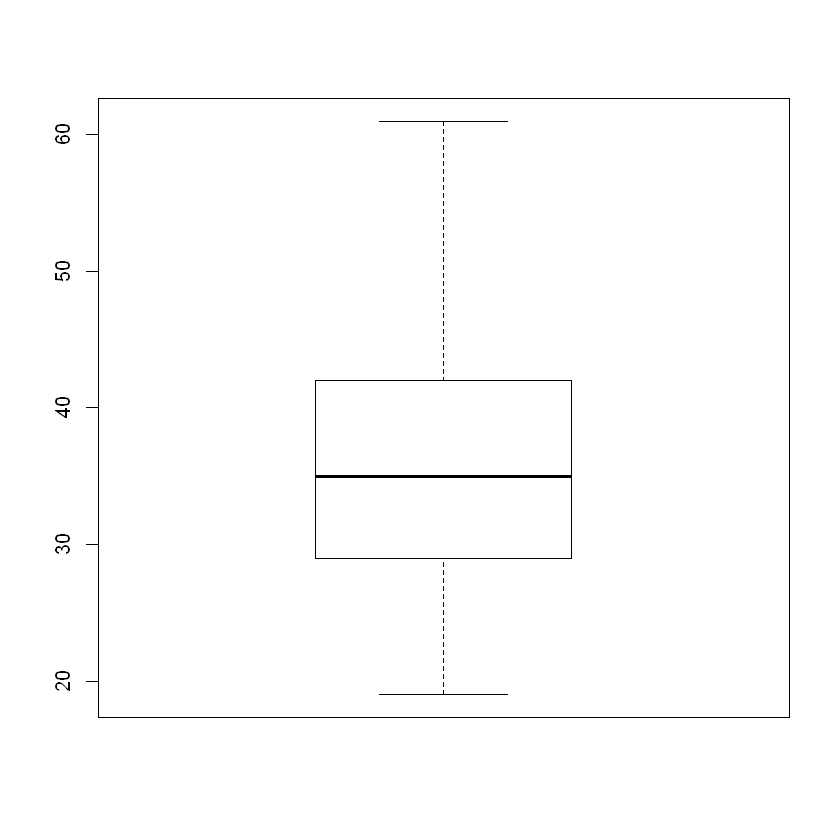

In [20]:
# Outliers in Age       

boxplot(advert$Age)

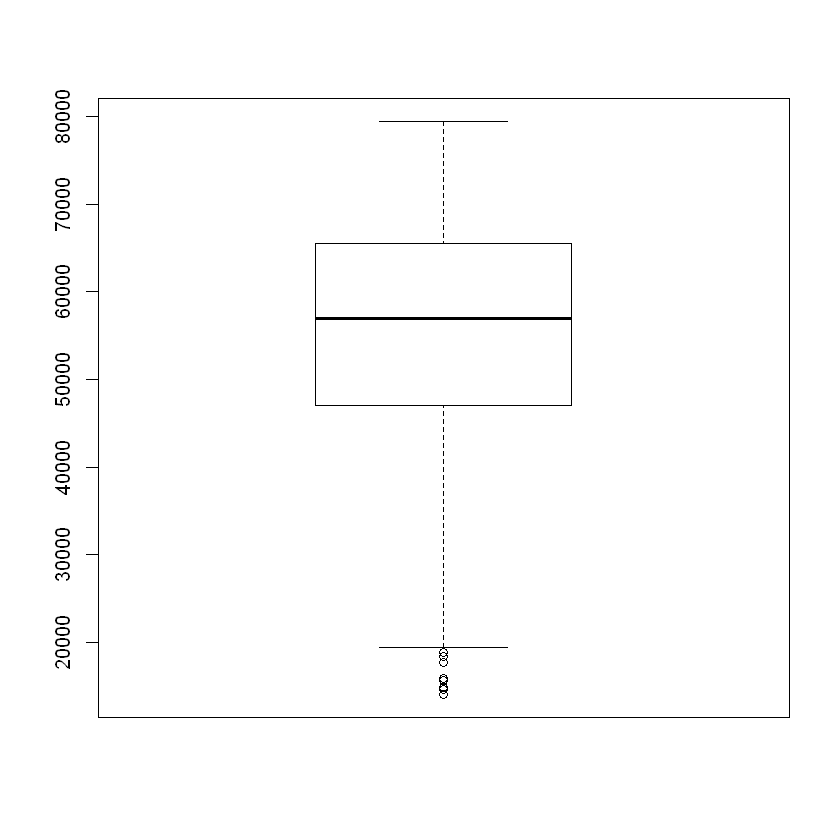

In [21]:
#Outliers in Area.Income

boxplot(advert$Area.Income)

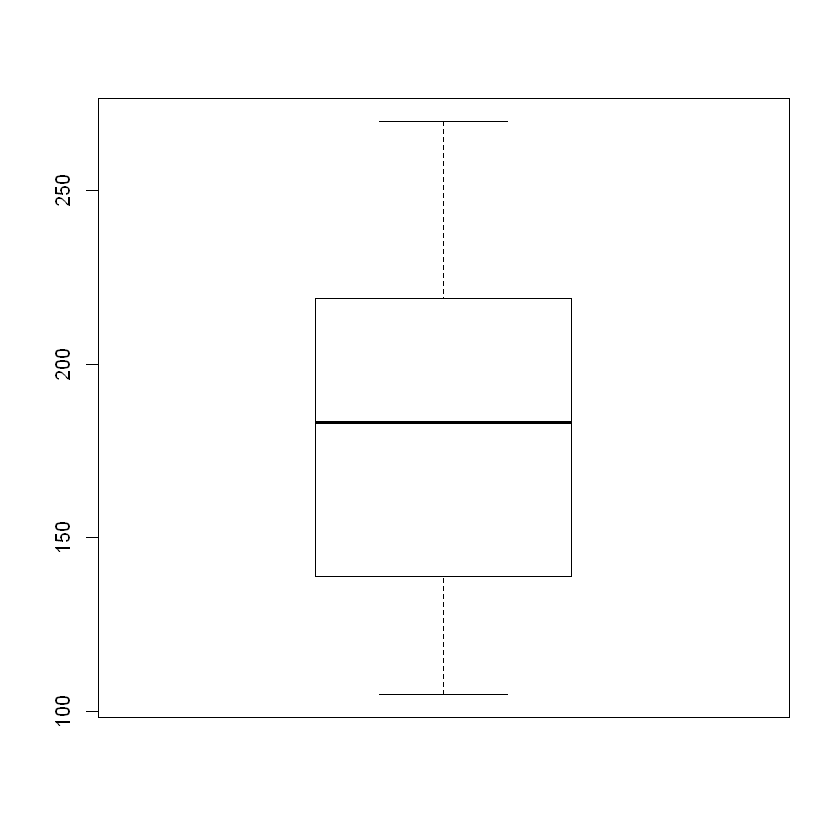

In [24]:
# Outliers in Daily.Internet.Usage

boxplot(advert$Daily.Internet.Usage)

# VISUALIZING OUR DATASET

> HISTOGRAM

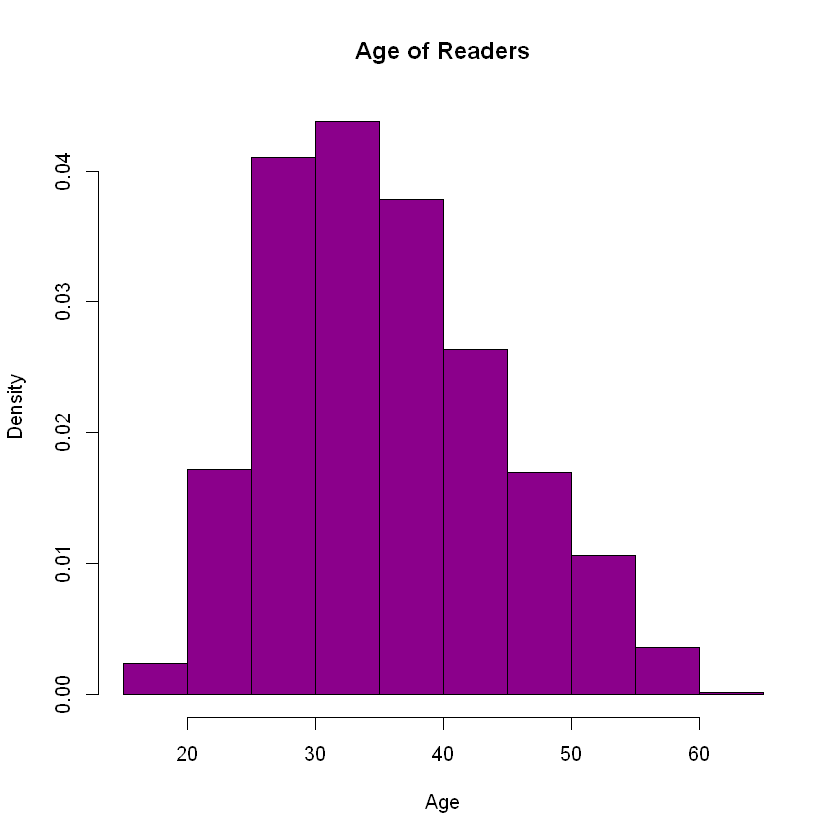

In [37]:
#Plotting Age

hist(advert$Age,
    main="Age of Readers",
    xlab="Age",
    col="darkmagenta",
    freq=FALSE,
    breaks = 10)

> SCATTER PLOTS

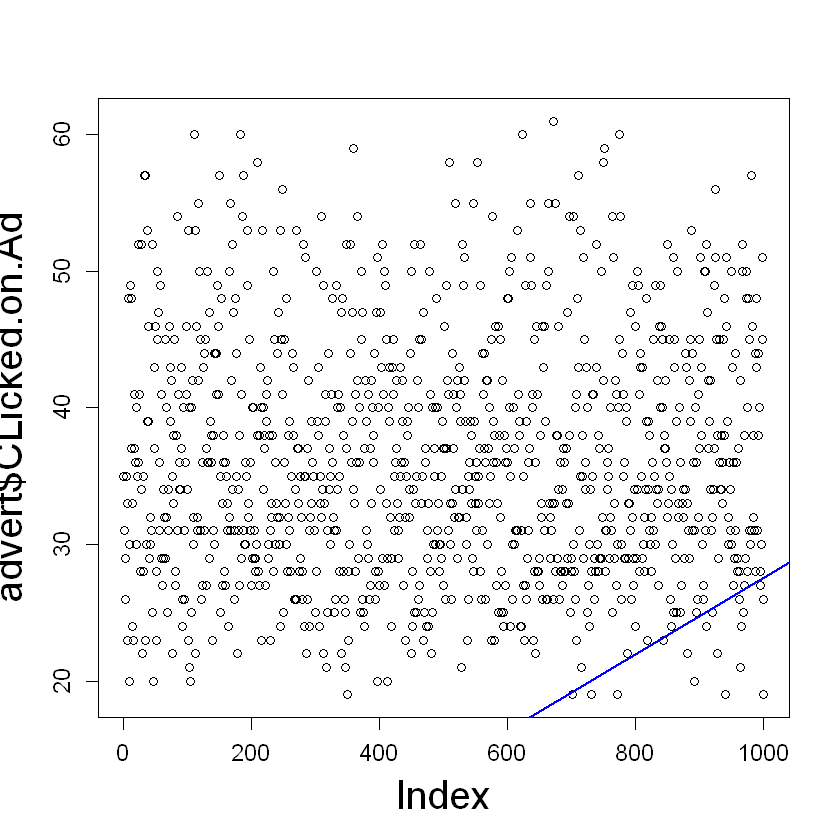

In [77]:
#Scatter plot on Readers Age and whether they clicked on Ad

Age= lm(advert$'Clicked.on.Ad' ~ advert$Age)

#par(mfrow= c(1,3))
plot(advert$Age, advert$'CLicked.on.Ad', cex.lab=2, cex.axis=1.2)
abline(Age, col='blue', lty=1, lwd=2)


> INSTALLING NECESSARY PACKAGES FOR OUR MODELLING

In [87]:
install.packages('xgboost')

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp4OfFL6\downloaded_packages


In [91]:
install.packages('randomForest')

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp4OfFL6\downloaded_packages


In [94]:
install.packages("Metrics")

package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp4OfFL6\downloaded_packages


In [95]:
install.packages('caret')

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp4OfFL6\downloaded_packages


In [103]:
install.packages("e1071")


package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER-PC\AppData\Local\Temp\Rtmp4OfFL6\downloaded_packages


In [96]:
#Importing necessary libraries

library(xgboost) # for xgboost
library(tidyverse) # general utility functions
library(randomForest) 
library(Metrics)
library(caret)

Loading required package: lattice

Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall

The following object is masked from 'package:purrr':

    lift



In [97]:
#Splitting our data into testing and training set

set.seed(1234)

training_indexs= createDataPartition(advert$Clicked.on.Ad, p= 0.2, list= F)
training= advert[training_indexs, ]
testing= advert[-training_indexs, ]

In [98]:
#Get predictors

predictors= training %>% select(-c(Clicked.on.Ad, Ad.Topic.Line, Timestamp, City, Country))%>% as.matrix()
output= training$Clicked.on.Ad %>% as.factor()
str(output)
class(output)

 Factor w/ 2 levels "0","1": 1 1 2 2 2 1 2 2 2 1 ...


[1] "factor"

> RANDOM FOREST CLASSIFIER

In [99]:
#Training a random Forest model

model= randomForest(x= predictors, y = output,
                   ntree= 50)
model


Call:
 randomForest(x = predictors, y = output, ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6%
Confusion matrix:
   0  1 class.error
0 96  4        0.04
1  8 92        0.08

In [104]:
#Use caret to pick a value for mtry

Rmodel= train(x= predictors, y= output,
             ntree=5,  #number of trees passed on Random Forest
             method= 'rf')
Rmodel

Random Forest 

200 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 200, 200, 200, 200, 200, 200, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9216173  0.8421784
  3     0.9311283  0.8611447
  5     0.9232241  0.8455184

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

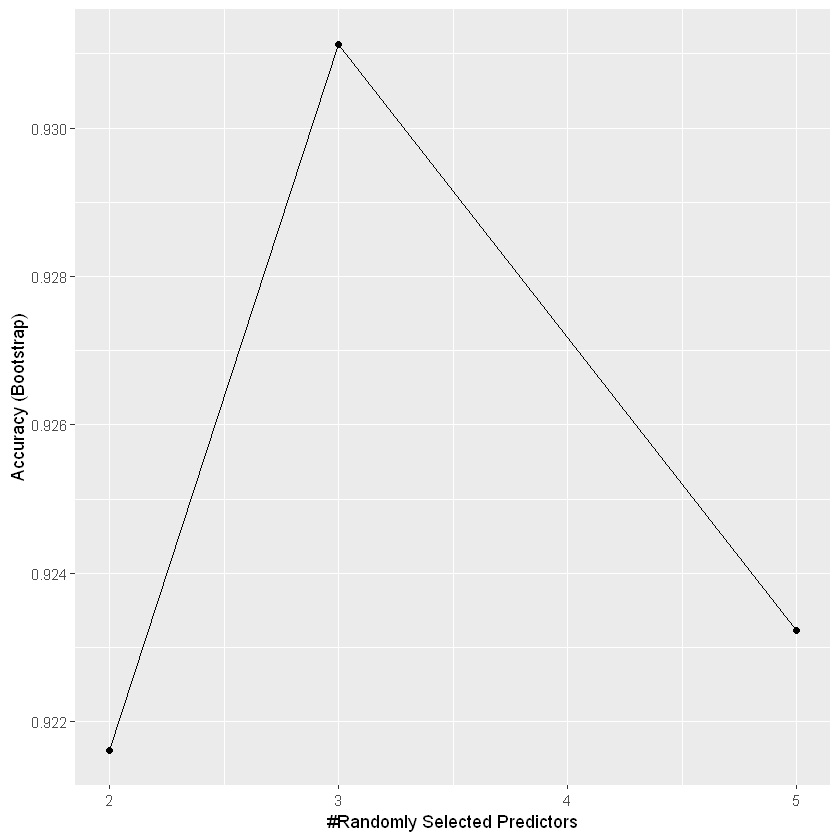

In [105]:
#Plot the RMSE for various possible training values

ggplot(Rmodel)


Call:
 randomForest(x = x, y = y, ntree = 5, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 5
No. of variables tried at each split: 3

        OOB estimate of  error rate: 8.74%
Confusion matrix:
   0  1 class.error
0 79 10  0.11235955
1  6 88  0.06382979

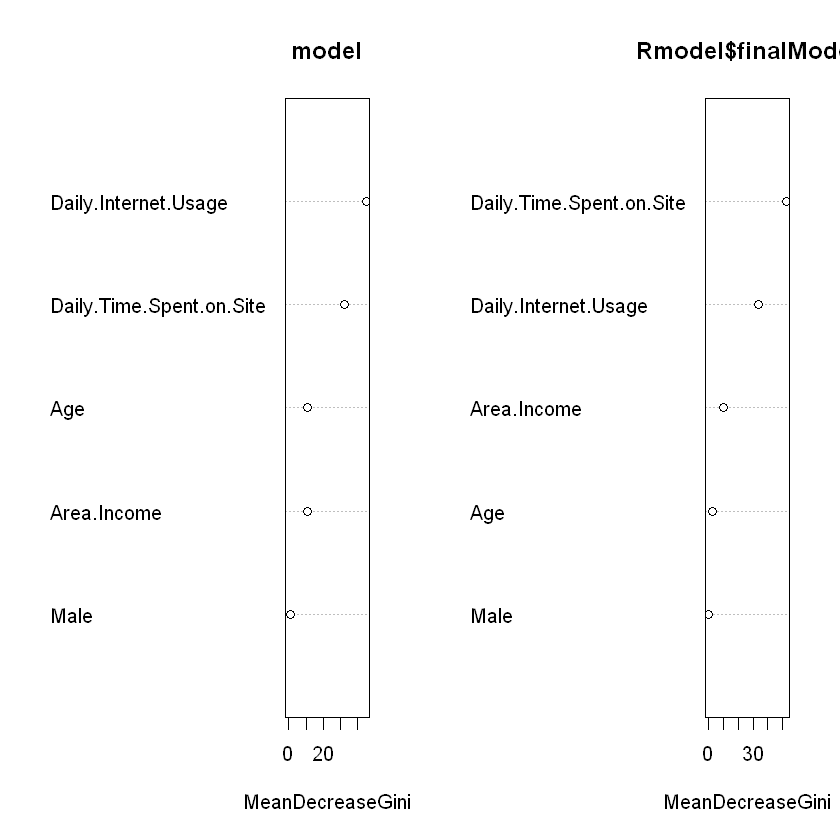

In [109]:
#Plot both plots at once

par(mfrow= c(1,2))
varImpPlot(model, n.var= 5)
varImpPlot(Rmodel$finalModel, n.var= 5)
Rmodel$finalModel